In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from insolation_model.geometry.solar import (
    get_solar_declination,
    get_solar_azimuth,
    get_solar_hour_angle,
    get_solar_zenith_angle,
)

In [ ]:
data = pd.DataFrame()

for latitude in np.arange(-90, 91, 10):
    for fractional_year in [0, 0.25, 0.5, 0.75]:  # np.linspace(0.0, 1.0, 4):
        declination = get_solar_declination(fractional_year)
        hours = np.linspace(0.0, 24.0, 100)
        hour_angles = [get_solar_hour_angle(x * 60) for x in hours]

        zeniths = [
            get_solar_zenith_angle(latitude, declination, x) for x in hour_angles
        ]
        elevations = [(np.pi / 2 - z) * 180 / np.pi for z in zeniths]
        azimuths = [get_solar_azimuth(latitude, declination, z) for z in zeniths]

        data = pd.concat(
            [
                data,
                pd.DataFrame(
                    {
                        "latitude": latitude,
                        "fractional_year": fractional_year,
                        "declination": declination,
                        "hour": hours,
                        "hour_angle": hour_angles,
                        "zenith": zeniths,
                        "elevation": elevations,
                        "azimuth": azimuths,
                    }
                ),
            ]
        )

/Users/dan/insolation_model/insolation_model/geometry/solar.py:71: RuntimeWarning: invalid value encountered in arccos
  return np.pi + np.arccos(


In [3]:
data.head()

,latitude,fractional_year,declination,hour,hour_angle,zenith,elevation,az
0,-90,0.0,0.0,0.000000,-3.141593,1.570796,0.0,6.283185
1,-90,0.0,0.0,0.242424,-3.078126,1.570796,0.0,6.283185
2,-90,0.0,0.0,0.484848,-3.014660,1.570796,0.0,6.283185
3,-90,0.0,0.0,0.727273,-2.951193,1.570796,0.0,6.283185
4,-90,0.0,0.0,0.969697,-2.887727,1.570796,0.0,6.283185


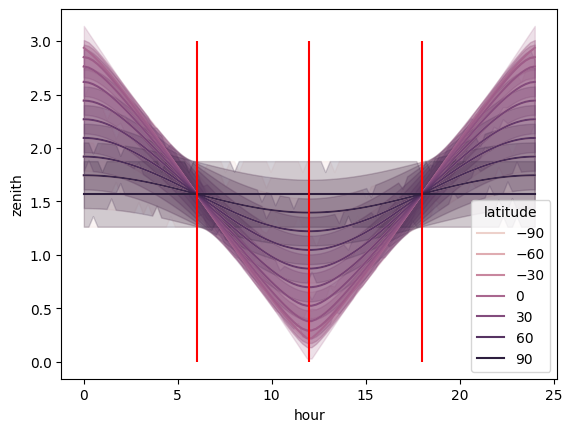

In [4]:
fig, ax = plt.subplots()
sns.lineplot(data=data, x="hour", y="zenith", hue="latitude", ax=ax)
plt.vlines([6, 12, 18], 0, 3, color="red")

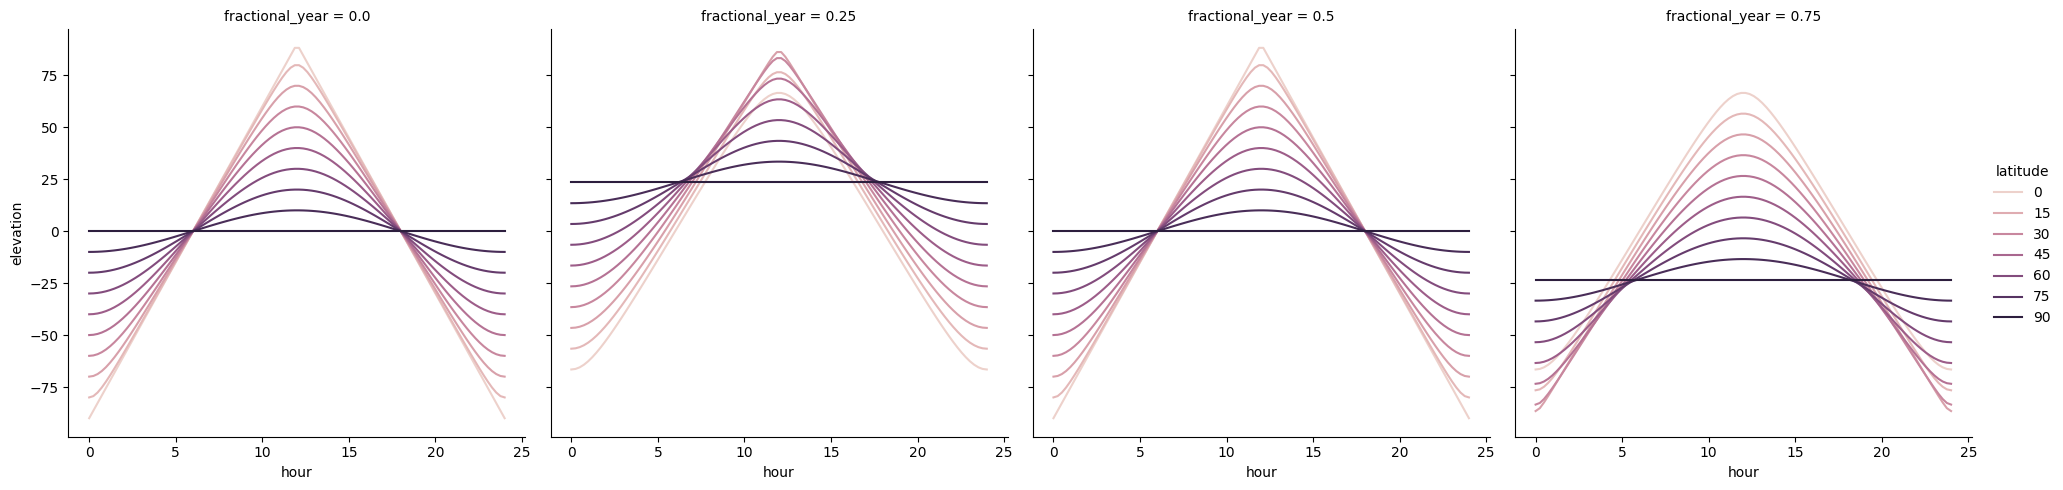

In [5]:
sns.relplot(
    data=data.query("latitude >= 0"),
    x="hour",
    y="elevation",
    hue="latitude",
    col="fractional_year",
    kind="line",
)

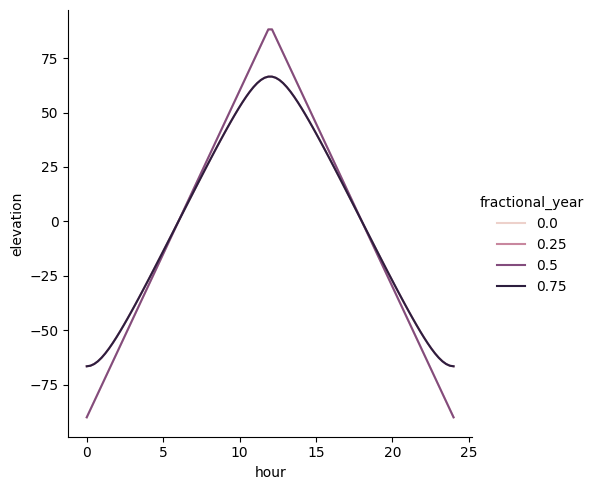

In [6]:
sns.relplot(
    data=data.query("latitude == 0"),
    x="hour",
    y="elevation",
    hue="fractional_year",
    kind="line",
)

In [7]:
sns.relplot(
    data=data.query("latitude == 0"),
    x="hour",
    y="azimuth",
    hue="fractional_year",
    kind="line",
)

ValueError: Could not interpret value `azimuth` for `y`. An entry with this name does not appear in `data`.